In [1]:
import pandas as pd
import sklearn 
%config IPCompleter.use_jedi=False

In [2]:
traindata = pd.read_csv("Data/Train.csv")

In [3]:
traindata

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,month
0,5830197,662,2018-08-21 00:44:50.3050,2018-08-21 00:55:53.0320,3177.0,W 84 St & Broadway,40.786795,-73.977112,3553.0,Frederick Douglass Blvd & W 112 St,40.801694,-73.957145,34204,Subscriber,1974,1,8
1,10532873,794,2018-05-01 17:16:43.6890,2018-05-01 17:29:58.0150,164.0,E 47 St & 2 Ave,40.753231,-73.970325,3372.0,E 74 St & 1 Ave,40.768974,-73.954823,33434,Subscriber,1984,2,5
2,14067690,506,2018-06-18 10:29:57.7520,2018-06-18 10:38:24.0760,382.0,University Pl & E 14 St,40.734927,-73.992005,487.0,E 20 St & FDR Drive,40.733143,-73.975739,17968,Subscriber,1989,1,6
3,2692568,422,2018-02-10 06:25:52.5810,2018-02-10 06:32:55.1090,3581.0,Underhill Ave & Lincoln Pl,40.674012,-73.967146,420.0,Clermont Ave & Lafayette Ave,40.687645,-73.969689,32625,Subscriber,1990,1,2
4,10249464,334,2018-12-21 10:32:55.6300,2018-12-21 10:38:29.9630,280.0,E 10 St & 5 Ave,40.733320,-73.995101,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,34174,Subscriber,1990,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10529000,15568804,1693,2018-04-15 10:26:15.7840,2018-04-15 10:54:29.2760,173.0,Broadway & W 49 St,40.760683,-73.984527,3161.0,W 76 St & Columbus Ave,40.780184,-73.977285,17085,Subscriber,1981,2,4
10529001,15166375,176,2018-06-09 09:31:21.4310,2018-06-09 09:34:17.8630,3349.0,Grand Army Plaza & Plaza St West,40.672968,-73.970880,3576.0,Park Pl & Vanderbilt Ave,40.676700,-73.969024,30462,Subscriber,1991,1,6
10529002,16574002,1378,2018-04-29 15:10:14.5560,2018-04-29 15:33:13.4110,3310.0,14 St & 7 Ave,40.663779,-73.983968,3580.0,St Johns Pl & Washington Ave,40.673724,-73.963161,32930,Subscriber,1988,2,4
10529003,4209343,864,2018-09-24 17:02:13.0220,2018-09-24 17:16:37.4010,524.0,W 43 St & 6 Ave,40.755273,-73.983169,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,19990,Subscriber,1994,1,9


## Exploratory Analysis

Lets see how unbalanced the classes are

8.077620559261858


<AxesSubplot:>

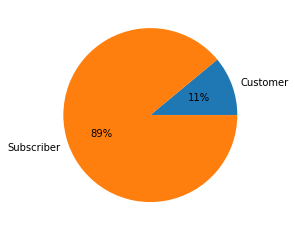

In [21]:
counts = traindata.groupby("usertype").size()
ratio = counts["Subscriber"] / counts["Customer"]
print(ratio)
counts.plot.pie(autopct='%1.0f%%',ylabel="")

Is this the same for each month?

<AxesSubplot:xlabel='month'>

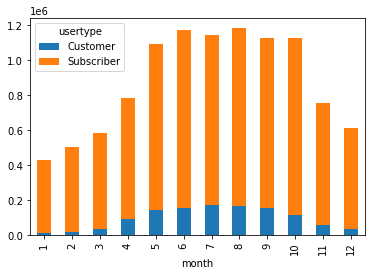

In [31]:
counts = traindata.groupby(["usertype","month"]).size()
counts = counts.unstack()
counts=counts.transpose()
counts.plot.bar(stacked=True)

We see that the amount of Customers varies more strongly with the month than the amount of subscribers.
We can confirm this by looking at the ratio of subscribers to customers for each month.

<AxesSubplot:xlabel='month', ylabel='Ratio of Subscribers to Customers'>

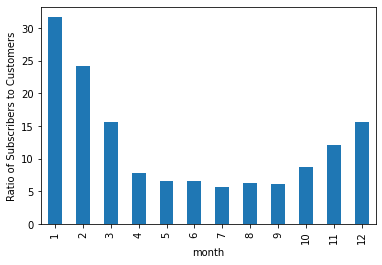

In [37]:
ratios = counts.loc[:,"Subscriber"] / counts.loc[:,"Customer"]
ratios.plot.bar(ylabel="Ratio of Subscribers to Customers")